In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns

In [2]:
# загружаем данные
train_data = pd.read_csv("../data/external/train_data.csv", sep=';')
test_data = pd.read_csv("../data/external/test_data.csv", sep=';')

In [3]:
#Заполнение пропусков строкой 'None'
train_data = train_data.fillna('None')
test_data = test_data.fillna('None')

In [4]:
# Обработка okpd2 и additional_code
train_data['okpd2_or_additional_code'] = train_data[['okpd2_code', 'additional_code']].apply(lambda x: x[0] if x[1] == 'None' else x[1], axis=1)
test_data['okpd2_or_additional_code'] = test_data[['okpd2_code', 'additional_code']].apply(lambda x: x[0] if x[1] == 'None' else x[1], axis=1)

In [5]:
digits = re.compile("[0-9]+")
def digits_only(text):
    return int(''.join(digits.findall(text)))

In [6]:
%%time
# приведение идентификаторов к числовому типу
train_data['pn_lot_id'] = train_data.pn_lot_anon.apply(digits_only)
test_data['pn_lot_id'] = test_data.pn_lot_anon.apply(digits_only)

Wall time: 1.01 s


In [7]:
# объединяем тренировочные и тестовые данные

# data = pd.concat([train_data, test_data]).reset_index()
data = pd.concat([train_data, test_data], ignore_index=True)
# data

In [8]:
data

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions,okpd2_or_additional_code,pn_lot_id
0,pn_lot_7031618,44fz,2,2019-08-26,Услуги по проведению финансового аудита,None,123500.00,69.2,Услуги по проведению финансового аудита,None,None,Услуги по проведению финансового аудита,69.2,7031618
1,pn_lot_7808247,44fz,2,2019-03-12,Приобретение призов для проведения конкурса по...,None,144000.00,26.4,"Телефоны головные, наушники и комбинированные ...",None,None,"Телефоны головные, наушники и комбинированные ...",26.4,7808247
2,pn_lot_7009496,44fz,2,2019-03-14,приобретение призов для проведения мероприятия...,None,124200.00,26.2,Устройства запоминающие внешние,None,None,Устройства запоминающие внешние,26.2,7009496
3,pn_lot_5938735,44fz,2,2019-03-14,Продление лицензии на 1С -Битрикс Управление с...,None,50000.00,46.5,Услуги по оптовой торговле программным обеспеч...,None,None,Продление лицензии на 1С -Битрикс Управление с...,46.5,5938735
4,pn_lot_9327348,44fz,2,2019-06-26,Приобретение компьютерной техники,None,493441.00,26.2,Машины вычислительные электронные цифровые про...,None,None,монитор || системные блоки системный блок,26.2,9327348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862994,pn_lot_5373821,223fz,23,2020-12-01,Право заключения договора на выполнение строит...,Выполнение строительно-монтажных и пусконаладо...,308979.61,43.2,Работы по монтажу основных сетей электроосвеще...,43.2,Производство электромонтажных работ,None,43.2,5373821
862995,pn_lot_8396902,223fz,23,2020-12-01,Право заключения договора на выполнение строит...,Выполнение строительно-монтажных и пусконаладо...,782429.86,43.2,Работы по монтажу основных сетей электроосвеще...,43.2,Производство электромонтажных работ,None,43.2,8396902
862996,pn_lot_7569089,223fz,29,2020-12-01,Запрос ценовых предложений в электронной форме...,"Поставка дров топливных (Порода - береза, ель,...",6511500.00,02.2,Дрова из прочих пород и смесей пород деревьев,35.3,Обеспечение работоспособности котельных,"Поставка дров топливных (Порода - береза, ель,...",35.3,7569089
862997,pn_lot_2403905,223fz,23,2020-12-01,Право заключения договора на выполнение проект...,Выполнение проектно-изыскательских работ по об...,1531065.83,71.1,Услуги по инженерно-техническому проектировани...,71.1,"Деятельность в области инженерных изысканий, и...",None,71.1,2403905


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862999 entries, 0 to 862998
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   pn_lot_anon               862999 non-null  object 
 1   fz                        862999 non-null  object 
 2   region_code               862999 non-null  int64  
 3   min_publish_date          862999 non-null  object 
 4   purchase_name             862999 non-null  object 
 5   lot_name                  862999 non-null  object 
 6   lot_price                 862999 non-null  float64
 7   okpd2_code                862999 non-null  object 
 8   okpd2_names               862999 non-null  object 
 9   additional_code           862999 non-null  object 
 10  additional_code_names     862999 non-null  object 
 11  item_descriptions         862999 non-null  object 
 12  okpd2_or_additional_code  862999 non-null  object 
 13  pn_lot_id                 862999 non-null  i

In [9]:
data.describe()

,region_code,lot_price,pn_lot_id
count,862999.000000,8.629990e+05,8.629990e+05
mean,51.291667,3.809095e+06,4.997759e+06
std,24.210996,1.784804e+08,2.887249e+06
min,1.000000,0.000000e+00,1.002000e+03
25%,30.000000,9.999790e+04,2.500209e+06
50%,55.000000,3.200000e+05,4.989416e+06
75%,74.000000,1.035047e+06,7.501793e+06
max,99.000000,1.354438e+11,9.999996e+06


In [10]:
# data.min_publish_date.unique()

In [11]:
# !pip uninstall seaborn

<AxesSubplot:xlabel='lot_price', ylabel='Density'>

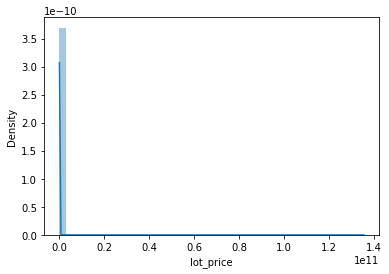

In [12]:
# посмотрим на распределение цены лота
sns.distplot(data['lot_price'])

<AxesSubplot:>

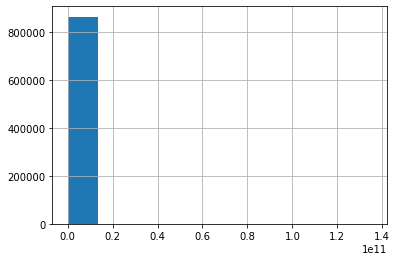

In [13]:
data['lot_price'].hist()

<AxesSubplot:xlabel='lot_price'>

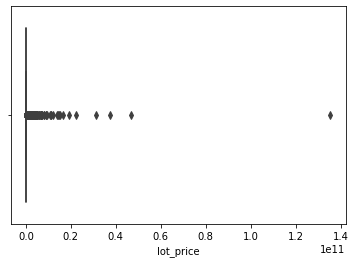

In [14]:
sns.boxplot(data['lot_price'])

In [15]:
# извлечем год и месяц лота в отдельные столбцы

In [16]:
re_year = re.compile("[0-9]{4}")
re_month = re.compile("[0-9]{4}-([0-9]{2})")
# re_year = r'[0-9]''
def extract_year(text):
    return ''.join(re_year.findall(text))

def extract_month(text):
    return ''.join(re_month.findall(text))

In [27]:
# data['year'] = data['min_publish_date'].str.extract(re_year).values.reshape(-1)
# data['year'] = data['min_publish_date'].apply(extract_year)
data['month'] = data['min_publish_date'].apply(extract_month)

In [28]:
# data.year.value_counts()

In [29]:
data.month.value_counts()

03    127239
04    120510
02    109170
11     79778
10     67382
12     64285
05     60483
09     60404
08     56905
07     51783
01     33991
06     31069
Name: month, dtype: int64

In [30]:
# прологарифмируем цену
data['log_lot_price'] = np.log(data.lot_price)
# для нулевых цен заменим отрицательные значения логарифма нулем
data.loc[data['log_lot_price'] < 0, 'log_lot_price'] = 0

In [31]:
# нормируем логарифмированную цену
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
data['scale_log_lot_price'] = mm_scaler.fit_transform(pd.DataFrame(data.log_lot_price))

In [32]:
data.describe()

,region_code,lot_price,pn_lot_id,log_lot_price,scale_log_lot_price
count,862999.000000,8.629990e+05,8.629990e+05,862999.000000,862999.000000
mean,51.291667,3.809095e+06,4.997759e+06,12.745474,0.497252
std,24.210996,1.784804e+08,2.887249e+06,1.857801,0.072480
min,1.000000,0.000000e+00,1.002000e+03,0.000000,0.000000
25%,30.000000,9.999790e+04,2.500209e+06,11.512905,0.449164
50%,55.000000,3.200000e+05,4.989416e+06,12.676076,0.494544
75%,74.000000,1.035047e+06,7.501793e+06,13.849957,0.540342
max,99.000000,1.354438e+11,9.999996e+06,25.631823,1.000000


In [33]:
# закодируем год и месяц с помощью OneHotEncoder

In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [35]:
# ohe_year = ohe.fit_transform(data[['year']]).toarray()
# ohe_year = pd.DataFrame(data['pn_lot_id']).join(pd.DataFrame(ohe_year, columns='year_'+ohe.categories_[0]))
# # ohe_year = pd.DataFrame(data['pn_lot_id']).join(pd.DataFrame(ohe_year, columns=ohe.categories_[0]))
# ohe_year

In [36]:
ohe_month = ohe.fit_transform(data[['month']]).toarray()
ohe_month = pd.DataFrame(data['pn_lot_id']).join(pd.DataFrame(ohe_month, columns='month_'+ohe.categories_[0]))
ohe_month

,pn_lot_id,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,7031618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7808247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7009496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5938735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9327348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862994,5373821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862995,8396902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862996,7569089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862997,2403905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# соединяем месяц, логарифмированную отнормированную цену и сохраняем в csv файл для дальнейшей работы

In [38]:
# ohe_date = ohe_year.merge(ohe_month, on='pn_lot_id')
# ohe_date_log_scale_price = ohe_date.join(data['scale_log_lot_price'])
ohe_date_log_scale_price = ohe_month.join(data['scale_log_lot_price'])
ohe_date_log_scale_price

,pn_lot_id,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12,scale_log_lot_price
0,7031618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.457400
1,7808247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463391
2,7009496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457621
3,5938735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422123
4,9327348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862994,5373821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.493177
862995,8396902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.529426
862996,7569089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.612094
862997,2403905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.555617


In [27]:
ohe_date_log_scale_price.to_csv('../data/intermid/ohe_date_log_scale_price.csv', index=False, encoding='utf-8')